In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import obspy

In [2]:
pref="/uufs/chpc.utah.edu/common/home/koper-group1/alysha/Yellowstone/data/waveformArchive/pDetector"
validate_file = f"{pref}/p_resampled_10s/currenteq.validate.10s.1dup.csv"
catalog_file= f"{pref}/P_current_earthquake_catalog.csv"
catalog_wf_file = f"{pref}/P_current_earthquake_catalog.h5"

validate_df = pd.read_csv(validate_file)
catalog_df = pd.read_csv(catalog_file)

In [3]:
validate_df.head()

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
0,60067967,US,HWUT,1.0,BHZ,BHN,BHE,P,1.399620e+09,0.75,...,-112.495667,0.34,1.399620e+09,0.89,d,F,le,26883,26883,140509
1,60440722,WY,YNR,1.0,HHZ,HHN,HHE,P,1.624286e+09,0.75,...,-110.783333,7.75,1.624286e+09,1.03,l,F,le,163555,163555,210621
2,60441072,PB,B207,NaN,EHZ,EH1,EH2,P,1.624307e+09,0.75,...,-110.758833,8.05,1.624307e+09,1.33,l,F,le,164075,164075,210621
3,60094757,WY,YUF,1.0,HHZ,HHN,HHE,P,1.417689e+09,1.00,...,-110.521500,6.03,1.417689e+09,2.08,l,F,le,35484,35484,141204
4,60337937,UU,CTU,1.0,HHZ,HHN,HHE,P,1.567088e+09,0.75,...,-111.572667,6.07,1.567088e+09,1.20,l,F,le,108488,108488,190829


In [4]:
catalog_df.head()

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type
0,60000004,UU,JLU,1.0,HHZ,HHN,HHE,P,1.349658e+09,1.00,...,-111.44995,2285.0,40.567833,-111.2855,12.41,1.349658e+09,0.01,d,F,le
1,60000004,UU,BSUT,1.0,HHZ,HHN,HHE,P,1.349658e+09,0.50,...,-110.76120,3211.0,40.567833,-111.2855,12.41,1.349658e+09,0.01,d,F,le
2,60000005,WY,YMR,1.0,HHZ,HHN,HHE,P,1.349112e+09,0.75,...,-110.96500,2149.0,44.743333,-111.0675,5.48,1.349112e+09,-0.20,d,F,le
3,60000005,WY,YHH,1.0,HHZ,HHN,HHE,P,1.349112e+09,0.75,...,-110.85050,2717.0,44.743333,-111.0675,5.48,1.349112e+09,-0.20,d,F,le
4,60000010,PB,B207,1.0,EHZ,EHN,EHE,P,1.349101e+09,0.50,...,-110.84850,2182.0,44.438167,-111.0320,6.05,1.349101e+09,0.35,d,F,le


In [5]:
catalog_df.iloc[26883]["arrival_time"]

1399619860.5515075

In [6]:
validate_df.iloc[0]["arrival_time"]

1399619860.55

In [7]:
rand_ind_first = np.random.randint(0, len(validate_df))
rand_row_first = validate_df.iloc[rand_ind_first]

In [8]:
rand_row_first

evid                           60417882
network                              WY
station                             YMR
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.60507e+09
pick_quality                          1
first_motion                         -1
take_off_angle                      131
source_receiver_distance              4
source_receiver_azimuth           188.4
travel_time_residual               0.03
receiver_lat                    44.6687
receiver_lon                   -110.965
receiver_elev                      2149
event_lat                       44.7042
event_lon                      -110.958
event_depth                        1.43
origin_time                 1.60507e+09
magnitude                           0.4
magnitude_type                        d
rflag                                 F


In [9]:
z_indicator = "channelz"
evid = rand_row_first.evid
net = rand_row_first.network
sta = rand_row_first.station
cha = rand_row_first[z_indicator]
loc = rand_row_first.location
mag = rand_row_first.magnitude
sr_dist = rand_row_first.source_receiver_distance
df_subset = validate_df[ (validate_df.evid != evid) & (validate_df.network == net) & (validate_df.station == sta) &
                         (validate_df[z_indicator] == cha) & (validate_df.location == loc) &
                         (validate_df.magnitude >= mag-0.1) & (validate_df.magnitude <= mag+1.5)]

In [10]:
df_subset

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
94,60359437,WY,YMR,1.0,HHZ,HHN,HHE,P,1.581246e+09,0.75,...,-110.408333,1.14,1.581246e+09,0.75,d,F,le,116889,116889,200209
154,60206017,WY,YMR,1.0,HHZ,HHN,HHE,P,1.497904e+09,1.00,...,-111.028000,7.87,1.497904e+09,0.81,d,F,le,63903,63903,170619
177,60204862,WY,YMR,1.0,HHZ,HHN,HHE,P,1.497694e+09,0.75,...,-111.020833,6.77,1.497694e+09,0.86,d,F,le,62702,62702,170617
183,60099132,WY,YMR,1.0,HHZ,HHN,HHE,P,1.421808e+09,0.75,...,-111.099333,10.99,1.421808e+09,0.66,d,F,le,36644,36644,150121
187,60469927,WY,YMR,1.0,HHZ,HHN,HHE,P,1.638000e+09,1.00,...,-110.724500,7.42,1.638000e+09,0.47,d,F,le,183456,183456,211127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17884,60005292,WY,YMR,1.0,HHZ,HHN,HHE,P,1.353097e+09,0.75,...,-110.753500,2.21,1.353097e+09,1.09,l,F,le,1527,1527,121116
17892,60075592,WY,YMR,1.0,HHZ,HHN,HHE,P,1.404246e+09,1.00,...,-110.970000,7.71,1.404246e+09,1.34,l,F,le,30371,30371,140701
17906,60441047,WY,YMR,1.0,HHZ,HHN,HHE,P,1.624304e+09,0.75,...,-110.756667,5.01,1.624304e+09,0.63,l,F,le,164051,164051,210621
17909,60001587,WY,YMR,1.0,HHZ,HHN,HHE,P,1.350276e+09,1.00,...,-111.108167,6.00,1.350276e+09,1.63,d,F,le,561,561,121015


In [11]:
rand_ind_subset = np.random.randint(0, len(df_subset))
rand_row_second = df_subset.iloc[rand_ind_subset]


In [12]:
rand_row_first

evid                           60417882
network                              WY
station                             YMR
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.60507e+09
pick_quality                          1
first_motion                         -1
take_off_angle                      131
source_receiver_distance              4
source_receiver_azimuth           188.4
travel_time_residual               0.03
receiver_lat                    44.6687
receiver_lon                   -110.965
receiver_elev                      2149
event_lat                       44.7042
event_lon                      -110.958
event_depth                        1.43
origin_time                 1.60507e+09
magnitude                           0.4
magnitude_type                        d
rflag                                 F


In [13]:
rand_row_second

evid                           60209167
network                              WY
station                             YMR
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.49866e+09
pick_quality                          1
first_motion                          1
take_off_angle                       99
source_receiver_distance             13
source_receiver_azimuth           169.1
travel_time_residual              -0.18
receiver_lat                    44.6687
receiver_lon                   -110.965
receiver_elev                      2149
event_lat                       44.7833
event_lon                      -110.996
event_depth                         5.6
origin_time                 1.49866e+09
magnitude                          0.78
magnitude_type                        d
rflag                                 F


In [14]:
file = h5py.File(catalog_wf_file, "r")
wf1 = file["X"][rand_row_first.original_rows]
wf2 = file["X"][rand_row_second.original_rows]
file.close()

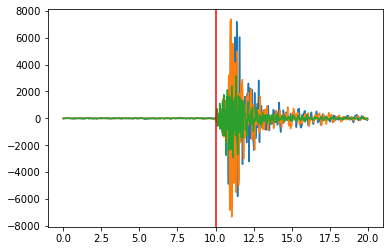

In [15]:
plt.plot(np.arange(0, 20, 0.01), wf1[:, :])
plt.axvline(10, color="r")


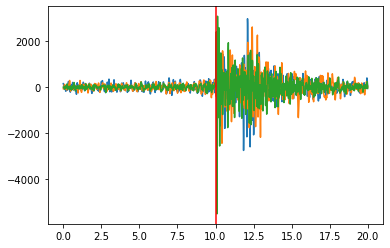

In [16]:
plt.plot(np.arange(0, 20, 0.01), wf2[:, :])
plt.axvline(10, color="r")

In [17]:
def rescale_waveform(x_large, x_small, mag_diff, to_plot=False, normalize_separate=True):
    assert mag_diff >= 0, "Magnitude difference must be non-negative"
    #print("magnitude difference", mag_diff)
    # TODO: Check if I need to rescale each trace individual or if it already does that
    # rescale value is very similar between components now that the input traces were normalized separate. But adds in
    # potential divide by 0 errors => removing
    if normalize_separate:
        m1_max = np.max(abs(x_large), axis=0)
        m2_max = np.max(abs(x_small), axis=0)
    else:
        m1_max = np.max(abs(x_large))
        m2_max = np.max(abs(x_small))
    print("M1 max amplitude", m1_max)
    print("M2 max amplituide", m2_max)
    new_max = m1_max * 1 / 10 ** (mag_diff)
    print("reduce M2 amplitude by", 10 ** mag_diff)
    print("new max of m2 should be", new_max)
    rescale_factor = m2_max / new_max
    m2_new = x_small / rescale_factor
    print("new max is", np.max(abs(m2_new)))
    if to_plot:
        fig, axes = plt.subplots(3)
        axes[0].plot(range(x_small.shape[0]), x_small[:, 0])
        axes[0].plot(range(x_small.shape[0]), m2_new[:, 0])
        axes[1].plot(range(x_small.shape[0]), x_small[:, 1])
        axes[1].plot(range(x_small.shape[0]), m2_new[:, 1])
        axes[2].plot(range(x_small.shape[0]), x_small[:, 2])
        axes[2].plot(range(x_small.shape[0]), m2_new[:, 2])
        plt.suptitle((f"Magnitude difference: {mag_diff:0.2f} - Reduced by: {rescale_factor}"))
        plt.show()
        #plt.close()
    #print("new max with other equation", np.max(abs(x_small * m1_max / (m2_max * 10 ** mag_diff))))
    #print("calculate magnitude difference by log10(amplitude ratio)", np.log10(m1_max / np.max(abs(m2_new))))
    return m2_new, x_small, rescale_factor

In [18]:
mag_diff = rand_row_first.magnitude - rand_row_second.magnitude

In [19]:
wf1_max = np.max(wf1)
wf1_norm = wf1/wf1_max

wf2_max = np.max(wf2)
wf2_norm = wf2/wf2_max

M1 max amplitude 1.78531
M2 max amplituide 1.0
reduce M2 amplitude by 2.39883291902
new max of m2 should be 0.744242085397
new max is 0.744242


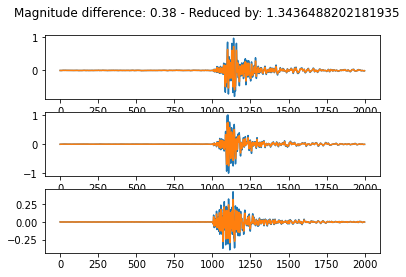

In [20]:
if mag_diff > 0:
    m2_new, x_small, rescale_factor = rescale_waveform(wf1_norm, wf2_norm, mag_diff, normalize_separate=False, to_plot=True)
    wf2_norm = m2_new
elif mag_diff < 0:
    m1_new, x_small, rescale_factor = rescale_waveform(wf2_norm, wf1_norm, abs(mag_diff), normalize_separate=False, to_plot=True)
    wf1_norm = m1_new

In [21]:
wf_length = 1008
if sr_dist <= 30:
    min_sep = int(sr_dist / 6*100) + 50
else:
    min_sep = int(sr_dist / 6*100) - 100
min_wf2 = 150
center_window = 250
max_first_event_sample = wf_length - min_sep - min_wf2
min_first_event_sample = wf_length // 2 - center_window
print(min_first_event_sample, max_first_event_sample)
first_event_sample = np.random.randint(min_first_event_sample, max_first_event_sample)
print(first_event_sample)

254 742
308


In [22]:
# np.random.randint(-max_lag, max_lag+1, size=n_obs*n_duplicate)
# np.random.randint in range [low, high) => includes [-250, 250]
min_second_event_sample = np.max([wf_length // 2 + center_window + 1, first_event_sample + min_sep])
max_second_event_sample = wf_length - min_wf2
print(min_second_event_sample, max_second_event_sample)
second_event_sample = np.random.randint(min_second_event_sample, max_second_event_sample)
print(second_event_sample)

755 858
758


In [23]:
org_pick_sample = wf1.shape[0]//2
wf1_trim = wf1_norm[org_pick_sample-first_event_sample:org_pick_sample+(wf_length-first_event_sample)]

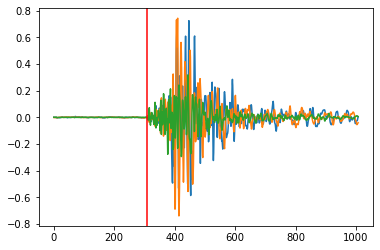

In [24]:
plt.plot(range(wf_length), wf1_trim[:, :])
plt.axvline(first_event_sample, color="r")

In [25]:
wf2_buffer = 50
wf2_trim = np.copy(wf2_norm[org_pick_sample-wf2_buffer:org_pick_sample+(wf_length - second_event_sample + wf2_buffer)])

In [26]:
channels = {0:"E", 1:"N", 2:"Z"}
st = obspy.Stream()
for ind in range(3):
    tr = obspy.Trace(np.copy(wf2_trim[:, ind]))
    tr.stats.channel = channels[ind]
    tr.stats.delta = 0.01
    tr.stats.sampling_rate = 100
    st += tr
    print(st[ind].stats)

         network: 
         station: 
        location: 
         channel: E
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:03.490000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 350
           calib: 1.0
         network: 
         station: 
        location: 
         channel: N
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:03.490000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 350
           calib: 1.0
         network: 
         station: 
        location: 
         channel: Z
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:03.490000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 350
           calib: 1.0


In [27]:
st.taper(max_percentage=0.05)

3 Trace(s) in Stream:
...E | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:03.490000Z | 100.0 Hz, 350 samples
...N | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:03.490000Z | 100.0 Hz, 350 samples
...Z | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:03.490000Z | 100.0 Hz, 350 samples

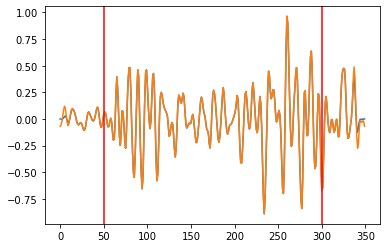

In [28]:
plt.plot(np.arange(0, wf2_trim.shape[0]), st[0].data)
plt.plot(np.arange(0, wf2_trim.shape[0]), wf2_trim[:, 0])
plt.axvline(50, color="r")
plt.axvline(wf2_trim.shape[0] - 50, color="r")

In [29]:
wf2_taper = np.concatenate([st[0].data.reshape(-1, 1), st[1].data.reshape(-1, 1), st[2].data.reshape(-1, 1)], axis=1)

In [30]:
wf2_taper_trim = wf2_taper[0:-wf2_buffer, :]

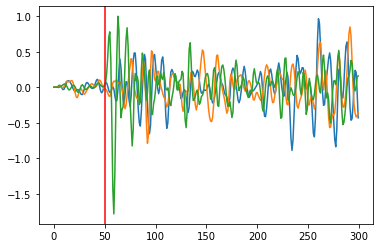

In [31]:
plt.plot(np.arange(0, wf2_taper_trim.shape[0]), wf2_taper_trim[:, :])
plt.axvline(50, color="r")

In [32]:
wf2_padded = np.zeros_like(wf1_trim)
wf2_padded[-wf2_taper_trim.shape[0]:] = wf2_taper_trim 

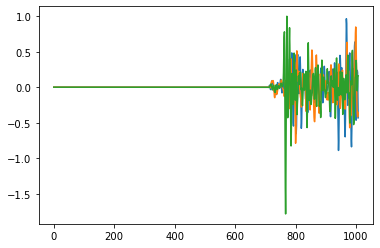

In [33]:
plt.plot(range(wf_length), wf2_padded)

In [34]:
combined_wf = wf1_trim + wf2_padded

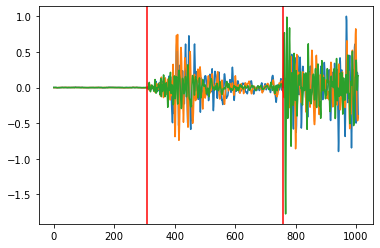

In [39]:
plt.plot(range(wf_length), combined_wf[:, :])
plt.axvline(first_event_sample, color="r")
plt.axvline(second_event_sample, color="r")

In [36]:
mag_diff

-0.38

In [37]:
rand_row_first.source_receiver_distance

4.0

In [38]:
min_sep

116